In [1]:
# Importing

import pandas as pd

covid_deaths_path = "covid19_deaths_dataset.csv"
covid_confirmed_path = "covid19_Confirmed_dataset.csv"
happiness_path = "worldwide_happiness_report.csv"

covid_deaths_raw = pd.read_csv(covid_deaths_path)
covid_confirmed_raw = pd.read_csv(covid_confirmed_path)
happiness_raw = pd.read_csv(happiness_path)

In [2]:
print(type(covid_deaths_raw))
print(type(covid_confirmed_raw))
print(type(happiness_raw))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [3]:
covid_deaths = covid_deaths_raw.melt(
    id_vars = ["Province/State", "Country/Region", "Lat", "Long"],
    var_name = "Date",
    value_name = "Deaths"
)

covid_confirmed = covid_confirmed_raw.melt(
    id_vars = ["Province/State", "Country/Region", "Lat", "Long"],
    var_name = "Date",
    value_name = "Confirmed"
)

In [4]:
covid_deaths = covid_deaths.rename(columns={"Country/Region": "Country"})
covid_confirmed = covid_confirmed.rename(columns={"Country/Region": "Country"})

In [5]:
covid_deaths["Date"] = pd.to_datetime(covid_deaths["Date"])
covid_confirmed["Date"] = pd.to_datetime(covid_confirmed["Date"])

In [7]:
covid_deaths = covid_deaths.groupby(["Country", "Date"])["Deaths"].sum().reset_index()
covid_confirmed = covid_confirmed.groupby(["Country", "Date"])["Confirmed"].sum().reset_index()

In [9]:
happiness = happiness_raw.rename(columns={
    "Country or region": "Country",   # fix here
    "Score": "Happiness Score",
    "GDP per capita": "GDP per Capita",
    "Social support": "Social Support",
    "Healthy life expectancy": "Life Expectancy",
    "Freedom to make life choices": "Freedom",
    "Generosity": "Generosity",
    "Perceptions of corruption": "Corruption"
})

In [10]:
happiness = happiness[[
    "Country", "Happiness Score", "GDP per Capita", "Social Support",
    "Life Expectancy", "Freedom", "Generosity", "Corruption"
]]

In [11]:
print(happiness.shape)
display(happiness.head())

(156, 8)


,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
snapshot_date = "2020-04-30"

In [13]:
covid_snapshot = covid_deaths[covid_deaths["Date"] == snapshot_date][["Country", "Deaths"]] \
    .merge(covid_confirmed[covid_confirmed["Date"] == snapshot_date][["Country", "Confirmed"]],
           on="Country", how="outer")

In [14]:
combined = happiness.merge(covid_snapshot, on="Country", how="inner")

In [15]:
print("Combined dataset shape:", combined.shape)
display(combined.head())

Combined dataset shape: (143, 10)


,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Deaths,Confirmed
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,211,4995
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,452,9356
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,210,7738
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,10,1797
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,4811,39512


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

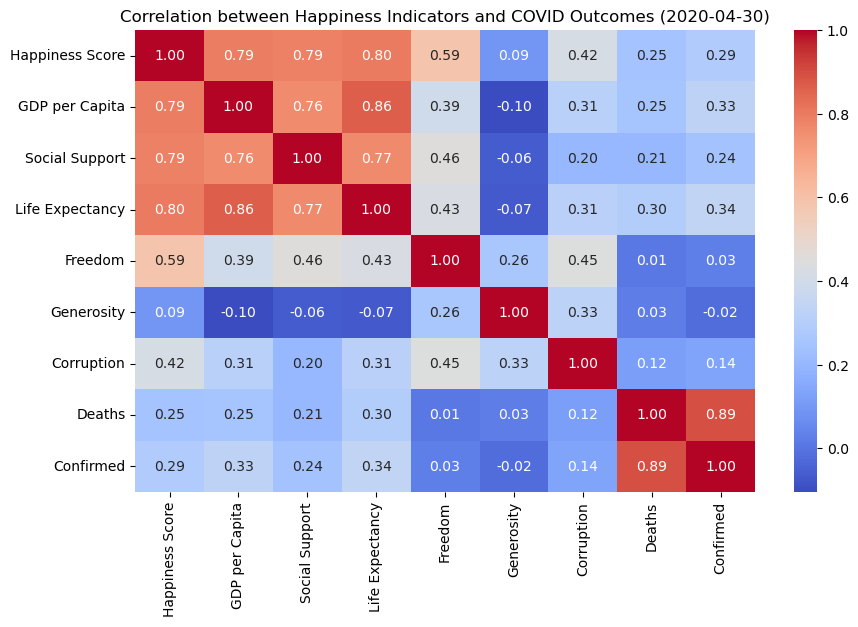

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(combined.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Happiness Indicators and COVID Outcomes (2020-04-30)")
plt.show()

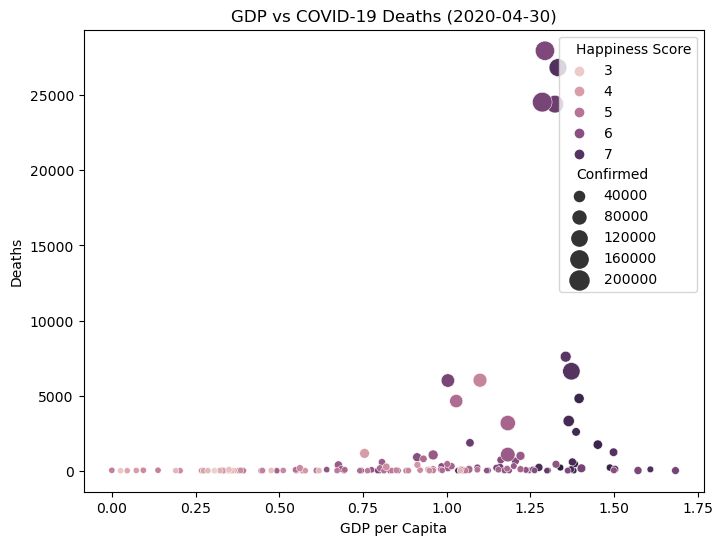

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined, x="GDP per Capita", y="Deaths", hue="Happiness Score", size="Confirmed", sizes=(20,200))
plt.title("GDP vs COVID-19 Deaths (2020-04-30)")
plt.show()

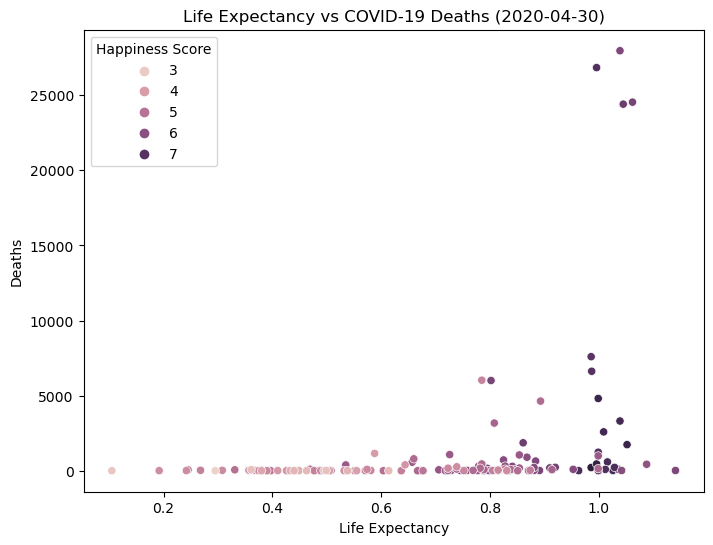

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined, x="Life Expectancy", y="Deaths", hue="Happiness Score")
plt.title("Life Expectancy vs COVID-19 Deaths (2020-04-30)")
plt.show()

In [20]:
print(combined.head())

       Country  Happiness Score  GDP per Capita  Social Support  \
0      Finland            7.769           1.340           1.587   
1      Denmark            7.600           1.383           1.573   
2       Norway            7.554           1.488           1.582   
3      Iceland            7.494           1.380           1.624   
4  Netherlands            7.488           1.396           1.522   

   Life Expectancy  Freedom  Generosity  Corruption  Deaths  Confirmed  
0            0.986    0.596       0.153       0.393     211       4995  
1            0.996    0.592       0.252       0.410     452       9356  
2            1.028    0.603       0.271       0.341     210       7738  
3            1.026    0.591       0.354       0.118      10       1797  
4            0.999    0.557       0.322       0.298    4811      39512  


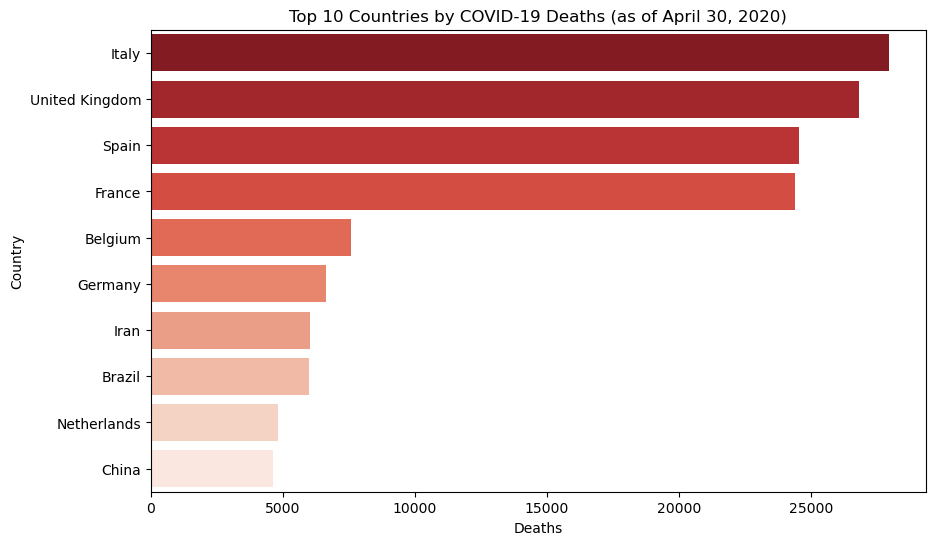

In [21]:
top_deaths = combined.sort_values("Deaths", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Deaths", y="Country", data=top_deaths, palette="Reds_r")
plt.title("Top 10 Countries by COVID-19 Deaths (as of April 30, 2020)")
plt.xlabel("Deaths")
plt.ylabel("Country")
plt.show()

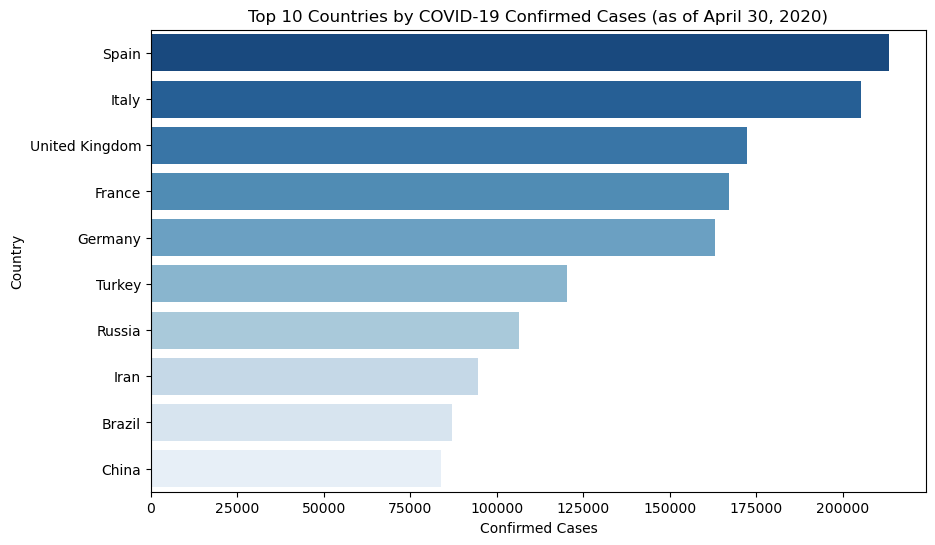

In [22]:
top_confirmed = combined.sort_values("Confirmed", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Confirmed", y="Country", data=top_confirmed, palette="Blues_r")
plt.title("Top 10 Countries by COVID-19 Confirmed Cases (as of April 30, 2020)")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.show()

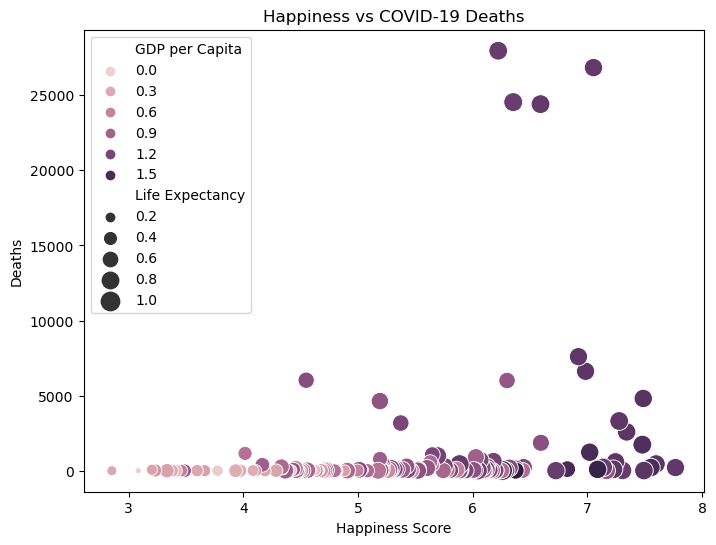

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Happiness Score", y="Deaths", data=combined, hue="GDP per Capita", size="Life Expectancy", sizes=(20,200))
plt.title("Happiness vs COVID-19 Deaths")
plt.xlabel("Happiness Score")
plt.ylabel("Deaths")
plt.legend()
plt.show()

In [25]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

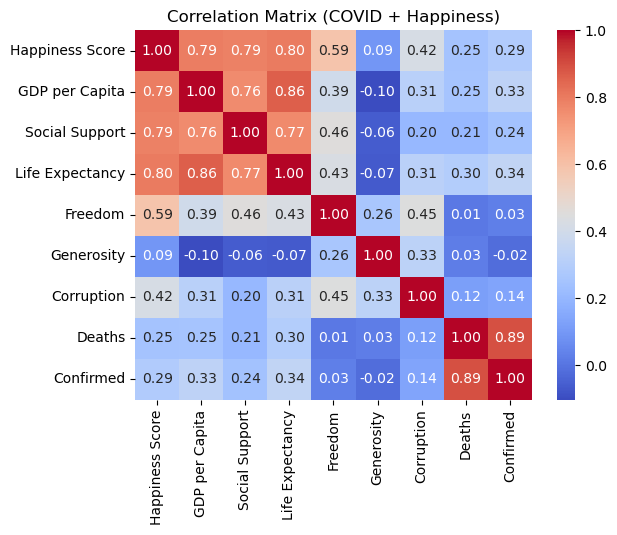

In [26]:
numeric_data = combined.select_dtypes(include=["number"])

corr = numeric_data.corr()   # now works in all pandas versions

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (COVID + Happiness)")
plt.show()

In [27]:
combined.to_csv("combined_covid_happiness.csv", index=False)

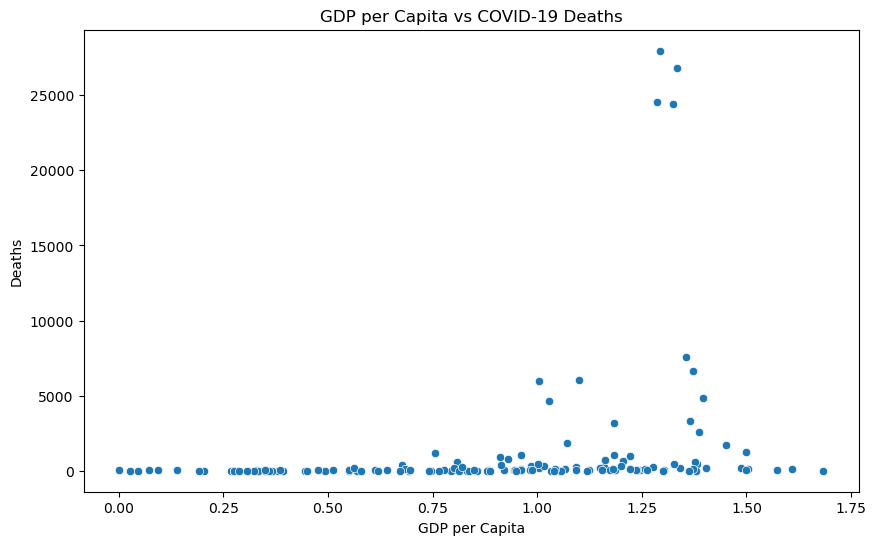

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="GDP per Capita", y="Deaths", data=combined)
plt.title("GDP per Capita vs COVID-19 Deaths")
plt.savefig("gdp_vs_deaths.png")

In [3]:
import nbformat
from nbconvert import HTMLExporter

In [4]:
notebook_name = "Covid-19 Analysis.ipynb"

In [5]:
html_exporter = HTMLExporter()
html_exporter.exclude_output_prompt = True
html_exporter.exclude_input_prompt = True

In [6]:
with open(notebook_name) as f:
    nb = nbformat.read(f, as_version=4)

In [7]:
(body, _) = html_exporter.from_notebook_node(nb)

In [10]:
with open("COVID19_Happiness_Summary.html", "w", encoding="utf-8") as f:
    f.write(body)